In [ ]:
#Below is the code used to generate the plots of the various Poisson Laguerre Flows at different values of alpha.
#When F=Xi, we first precompute the coefficients for a specific alpha and then compute the flow value by summing those.
#When F=Xi_i, we use the closed form from our paper to directly compute the flow values.

In [ ]:
%%gp
//This code that can be used to generate the first 300 coeficients of the expansion of the Laguerre flow for a choice of alpha in tes(n,alpha)
//Please note that in de output the exponential factor " E" should be replaced by 'e' to be correctly processed later for the plots.
default(realprecision, 500)
Phi(u) = 2*sum(n=1, 12, (2*Pi^2*n^4*exp(9*u/2)-3*Pi*n^2*exp(5*u/2))*exp(-Pi*n^2*exp(2*u)))
tes(n,a)= 2*gamma(n+1)/gamma(2*n+1)*intnum(x=0,12, Phi(x) * x^(2*n)*hypergeom([n+a+1], [n+1/2], -x^2/4))
for(n=0,300, printf("%1.120E \n", tes(n,1/2)))

Automated checks:
The sum of weighted coefficients is  : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : 25.596691 versus formula: 25.596240 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


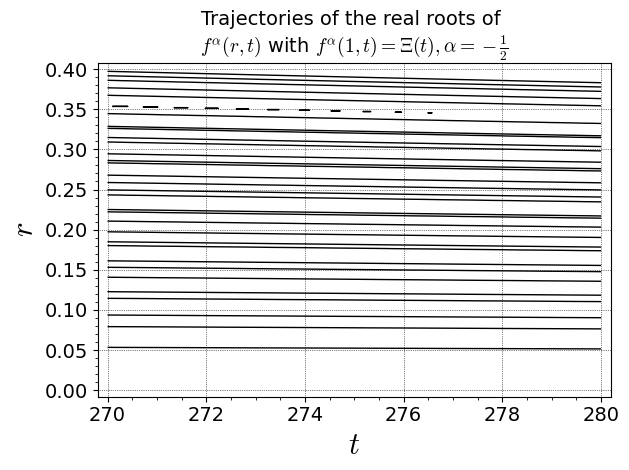

In [623]:
var("r","t");

CCF=ComplexBallField(1024)
RDF=RealBallField(1024)

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,1])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

#set alpha once here (and make sure the coefficient file for this specific alpha is loaded)
global alpha
alpha = CCF("-0.5")

global m1; m1 = []; CoeffSum = RDF(0); 
k = 0
with open("LagCoeffam1d2.txt", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + CCF(alpha+k+1).gamma()/(CCF(alpha+1).gamma() * RDF(k+1).gamma())* RDF(row)
        m1.append([RDF(row)])
        k = k + 1
        
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def LagPol(t,n):
    return CCF(t * t).laguerre_L(n, alpha)

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(300):
        sum=sum+CCF(r).pow(2*n)*CCF(str(m1[n]))*LagPol(t,n)
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,1+tr) - LaguerreFlow(x0,1+tr))/(tr*100)
        h = LaguerreFlow(x0, 1+tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = -1*(x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,300001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(300000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -1*sumzeros(k) - (CCF(alpha).mid() + 1/2)/ordrho[k-1] + ordrho[k-1]

print("Automated checks:")
print("The sum of weighted coefficients is  : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,1)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60, 1)-Xi(60)))
am1d2=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,270,280),(r,0,0.4),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$f^{\alpha}(r,t)$ with $f^\alpha(1,t) = \Xi(t), \alpha = -\frac{1}{2}$',gridlines=True,plot_points=500)
show(am1d2,aspect_ratio='automatic')

Automated checks:
The sum of weighted coefficients is  : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : 25.536717 versus formula: 25.536267 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


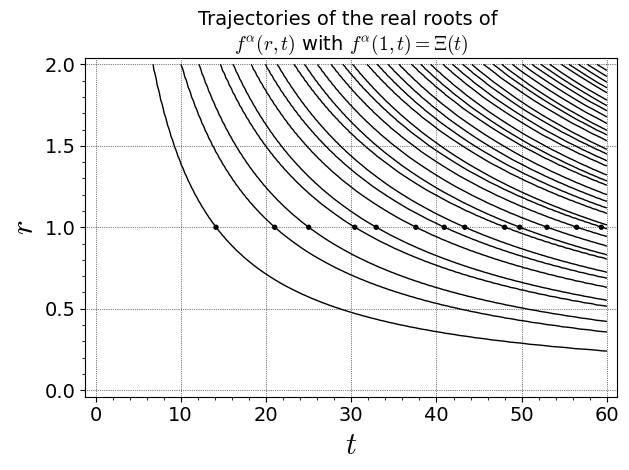

In [576]:
var("r","t");

CCF=ComplexBallField(1024)
RDF=RealBallField(1024)

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,1])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

#set alpha once here (and make sure the coefficient file for this specific alpha is loaded)
global alpha
alpha = CCF("1")

global m1; m1 = []; CoeffSum = RDF(0); 
k = 0
with open("LagCoeffa1.txt", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + CCF(alpha+k+1).gamma()/(CCF(alpha+1).gamma() * RDF(k+1).gamma())* RDF(row)
        m1.append([RDF(row)])
        k = k + 1
        
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def LagPol(t,n):
    return CCF(t * t).laguerre_L(n, alpha)

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(300):
        sum=sum+CCF(r).pow(2*n)*CCF(str(m1[n]))*LagPol(t,n)
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,1+tr) - LaguerreFlow(x0,1+tr))/(tr*100)
        h = LaguerreFlow(x0, 1+tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = -1*(x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,300001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(300000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -1*sumzeros(k) - (CCF(alpha).mid() + 1/2)/ordrho[k-1] + ordrho[k-1]

print("Automated checks:")
print("The sum of weighted coefficients is  : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,1)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60, 1)-Xi(60)))
a1n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,60),(r,0,2),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$f^{\alpha}(r,t)$ with $f^\alpha(1,t) = \Xi(t)$',gridlines=True,plot_points=150)
show(a1n+z,aspect_ratio='automatic')

Automated checks:
The sum of weighted coefficients is  : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : 24.936977 versus formula: 24.936527 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


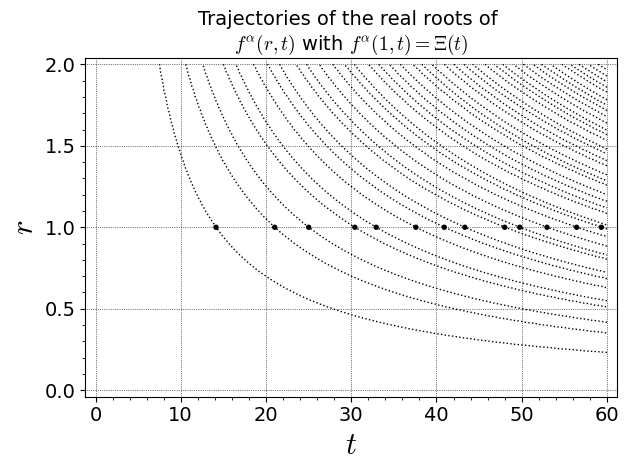

In [572]:
var("r","t");

CCF=ComplexBallField(1024)
RDF=RealBallField(1024)

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,1])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

#set alpha once here (and make sure the coefficient file for this specific alpha is loaded)
global alpha
alpha = CCF("16")

global m1; m1 = []; CoeffSum = RDF(0); 
k = 0
with open("LagCoeffa16.txt", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + CCF(alpha+k+1).gamma()/(CCF(alpha+1).gamma() * RDF(k+1).gamma())* RDF(row)
        m1.append([RDF(row)])
        k = k + 1
        
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def LagPol(t,n):
    return CCF(t * t).laguerre_L(n, alpha)

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(300):
        sum=sum+CCF(r).pow(2*n)*CCF(str(m1[n]))*LagPol(t,n)
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,1+tr) - LaguerreFlow(x0,1+tr))/(tr*100)
        h = LaguerreFlow(x0, 1+tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = -1*(x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,300001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(300000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -1*sumzeros(k) - (CCF(alpha).mid() + 1/2)/ordrho[k-1] + ordrho[k-1]

print("Automated checks:")
print("The sum of weighted coefficients is  : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,1)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60, 1)-Xi(60)))
a16n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,60),(r,0,2),color='black',fontsize=14,linestyle =":",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$f^{\alpha}(r,t)$ with $f^\alpha(1,t) = \Xi(t)$',gridlines=True,plot_points=150)
show(a16n+z,aspect_ratio='automatic')

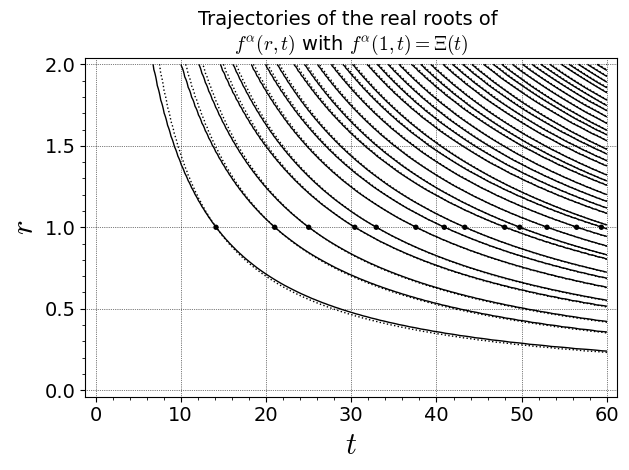

In [577]:
show(a1n+a16n+z,aspect_ratio='automatic')

Automated checks:
The sum of weighted coefficients is  : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : 17.281111 versus formula: 17.280661 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


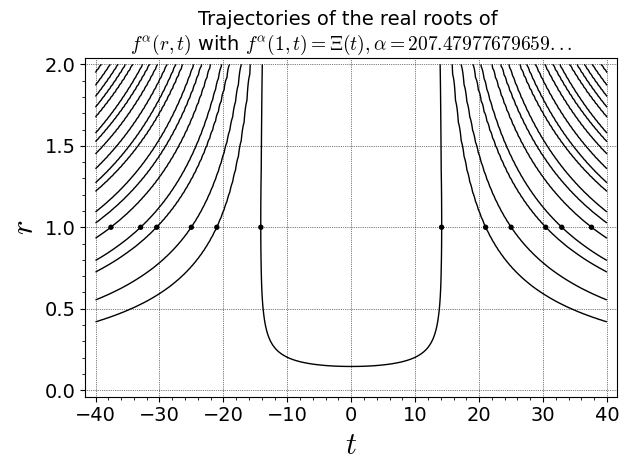

In [628]:
var("r","t");

CCF=ComplexBallField(1024)
RDF=RealBallField(1024)

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 40:
            ord.append([y,1])
            ord.append([-y,1])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

#set alpha once here (and make sure the coefficient file for this specific alpha is loaded)
global alpha
alpha = CCF("207.47977679659714232")

global m1; m1 = []; CoeffSum = RDF(0); 
k = 0
with open("LagCoeffa207.txt", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + CCF(alpha+k+1).gamma()/(CCF(alpha+1).gamma() * RDF(k+1).gamma())* RDF(row)
        m1.append([RDF(row)])
        k = k + 1
        
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def LagPol(t,n):
    return CCF(t * t).laguerre_L(n, alpha)

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(300):
        sum=sum+CCF(r).pow(2*n)*CCF(str(m1[n]))*LagPol(t,n)
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,1+tr) - LaguerreFlow(x0,1+tr))/(tr*100)
        h = LaguerreFlow(x0, 1+tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = -1*(x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,300001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(300000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -1*sumzeros(k) - (CCF(alpha).mid() + 1/2)/ordrho[k-1] + ordrho[k-1]

print("Automated checks:")
print("The sum of weighted coefficients is  : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,1)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60, 1)-Xi(60)))
a207n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,-40,40),(r,0,2),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$f^{\alpha}(r,t)$ with $f^\alpha(1,t) = \Xi(t), \alpha=207.47977679659...$',gridlines=True,plot_points=180)
show(a207n + z,aspect_ratio='automatic')

Automated checks:
The sum of weighted coefficients is  : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : 7.293050 versus formula: 7.292600 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


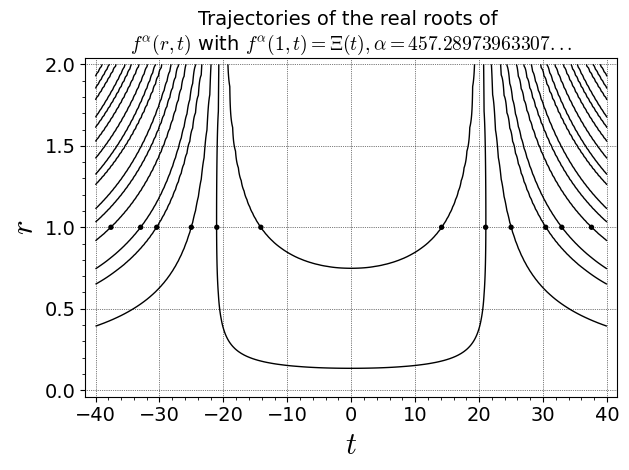

In [627]:
var("r","t");

CCF=ComplexBallField(1024)
RDF=RealBallField(1024)

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 40:
            ord.append([y,1])
            ord.append([-y,1])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

#set alpha once here (and make sure the coefficient file for this specific alpha is loaded)
global alpha
alpha = CCF("457.28973963307063695")

global m1; m1 = []; CoeffSum = RDF(0); 
k = 0
with open("LagCoeffa457.txt", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + CCF(alpha+k+1).gamma()/(CCF(alpha+1).gamma() * RDF(k+1).gamma())* RDF(row)
        m1.append([RDF(row)])
        k = k + 1
        
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def LagPol(t,n):
    return CCF(t * t).laguerre_L(n, alpha)

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(300):
        sum=sum+CCF(r).pow(2*n)*CCF(str(m1[n]))*LagPol(t,n)
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,1+tr) - LaguerreFlow(x0,1+tr))/(tr*100)
        h = LaguerreFlow(x0, 1+tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = -1*(x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,300001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(300000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -1*sumzeros(k) - (CCF(alpha).mid() + 1/2)/ordrho[k-1] + ordrho[k-1]

print("Automated checks:")
print("The sum of weighted coefficients is  : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,1)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60, 1)-Xi(60)))
a457n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,-40,40),(r,0,2),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$f^{\alpha}(r,t)$ with $f^\alpha(1,t) = \Xi(t), \alpha=457.28973963307...$',gridlines=True,plot_points=180)
show(a457n + z,aspect_ratio='automatic')

Automated checks:
The sum of weighted coefficients is  : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : -337.249698 versus formula: -337.250176 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


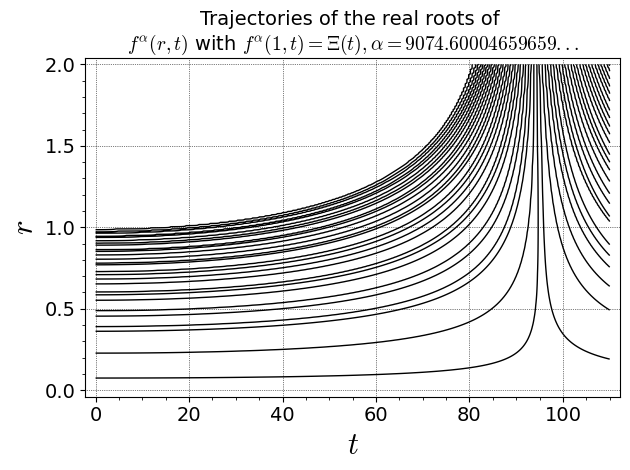

In [589]:
var("r","t");

CCF=ComplexBallField(1024)
RDF=RealBallField(1024)

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,1])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

#set alpha once here (and make sure the coefficient file for this specific alpha is loaded)
global alpha
alpha = CCF("9074.6000465965965587")

global m1; m1 = []; CoeffSum = RDF(0); 
k = 0
with open("LagCoeffa9074.txt", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + CCF(alpha+k+1).gamma()/(CCF(alpha+1).gamma() * RDF(k+1).gamma())* RDF(row)
        m1.append([RDF(row)])
        k = k + 1
        
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def LagPol(t,n):
    return CCF(t * t).laguerre_L(n, alpha)

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(300):
        sum=sum+CCF(r).pow(2*n)*CCF(str(m1[n]))*LagPol(t,n)
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,1+tr) - LaguerreFlow(x0,1+tr))/(tr*100)
        h = LaguerreFlow(x0, 1+tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = -1*(x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,300001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(300000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -1*sumzeros(k) - (CCF(alpha).mid() + 1/2)/ordrho[k-1] + ordrho[k-1]

print("Automated checks:")
print("The sum of weighted coefficients is  : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,1)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(100, 1)-Xi(100)))
a9074n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,110),(r,0,2),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$f^{\alpha}(r,t)$ with $f^\alpha(1,t) = \Xi(t), \alpha=9074.60004659659...$',gridlines=True,plot_points=300)
show(a9074n,aspect_ratio='automatic')

Automated checks:
The sum of weighted coefficients is  : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : -342.153756 versus formula: -342.154235 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


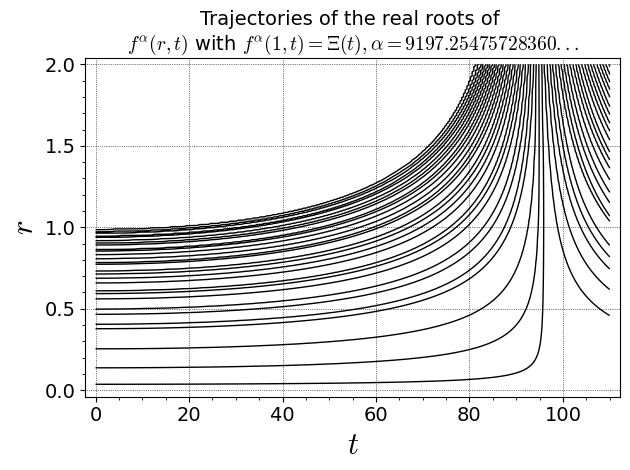

In [588]:
var("r","t");

CCF=ComplexBallField(1024)
RDF=RealBallField(1024)

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,1])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

#set alpha once here (and make sure the coefficient file for this specific alpha is loaded)
global alpha
alpha = CCF("9197.2547572836030293")

global m1; m1 = []; CoeffSum = RDF(0); 
k = 0
with open("LagCoeffa9197.txt", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + CCF(alpha+k+1).gamma()/(CCF(alpha+1).gamma() * RDF(k+1).gamma())* RDF(row)
        m1.append([RDF(row)])
        k = k + 1
        
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def LagPol(t,n):
    return CCF(t * t).laguerre_L(n, alpha)

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(300):
        sum=sum+CCF(r).pow(2*n)*CCF(str(m1[n]))*LagPol(t,n)
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,1+tr) - LaguerreFlow(x0,1+tr))/(tr*100)
        h = LaguerreFlow(x0, 1+tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = -1*(x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,300001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(300000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -1*sumzeros(k) - (CCF(alpha).mid() + 1/2)/ordrho[k-1] + ordrho[k-1]

print("Automated checks:")
print("The sum of weighted coefficients is  : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,1)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(100, 1)-Xi(100)))
a9197n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,110),(r,0,2),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$f^{\alpha}(r,t)$ with $f^\alpha(1,t) = \Xi(t), \alpha=9197.25475728360...$',gridlines=True,plot_points=300)
show(a9197n,aspect_ratio='automatic')

Automated checks:
d/dr z_3(0) via Newton approximation : 18.823030 versus formula: 18.823030 (should be equal).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


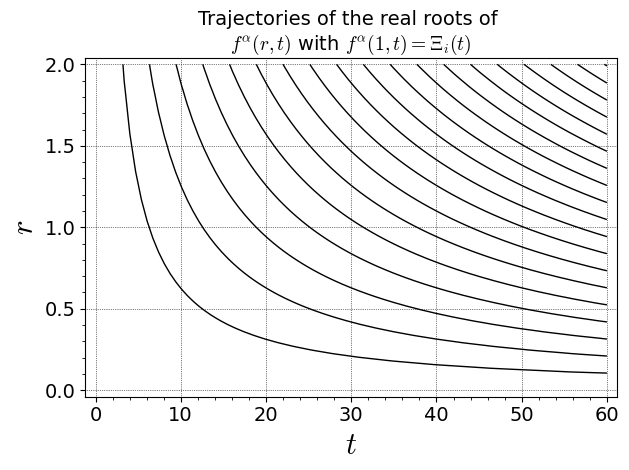

In [581]:
#Laguerre Flow direct evaluation for F = Xi_i

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),1])
z1=list_plot(ord, size=15, marker="o", color = "black")

CCF=ComplexBallField(53)

#set alpha once here:
global alpha
alpha = CCF("1")

def Xin(t):
    Xin=2 * CCF(t / 2).sin() / CCF(t)
    return Xin

#Laguerre flow closed form for F=Xi_i Humbert series expressed as finite series of 1F1s
CCF=ComplexBallField(200)

def LaguerreFlow(t, r):
    sumn=(DRF(0));
    for n in range(200):
        summandn =  CCF(-1).pow(n) / CCF(2*n+2).gamma() * CCF((CCF(r).pow(2)-1)/16).hypergeometric([CCF(alpha + n + 1)],[CCF("1.5")+n]) * CCF(CCF(t)*CCF(r)/2).pow(2*n)
        sumn = sumn + summandn
    return sumn

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000001");x0 = 2*k*RDF.pi();
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,1+tr) - LaguerreFlow(x0,1+tr))/(tr*100)
        h = LaguerreFlow(x0,1+tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = -1*(x1 - 2*k*RDF.pi())/(tr) 
    return dzdr3

#compute d/dr zk via formula
def verifyPDE(k):
    return 1/(2*k*pi())-(CCF(alpha)+CCF("0.5"))/(2*k*pi())+2*k*pi()

print("Automated checks:")
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be equal)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,1)-Xin(60)))

a1i1=implicit_plot(lambda t,r:(((LaguerreFlow(t, r)))),(t,0,60),(r,0,2),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$f^{\alpha}(r,t)$ with $f^\alpha(1,t) = \Xi_i(t)$',gridlines=True,plot_points=90)
show(a1i1,aspect_ratio='automatic')

Automated checks:
d/dr z_3(0) via Newton approximation : 18.027255 versus formula: 18.027255 (should be equal).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


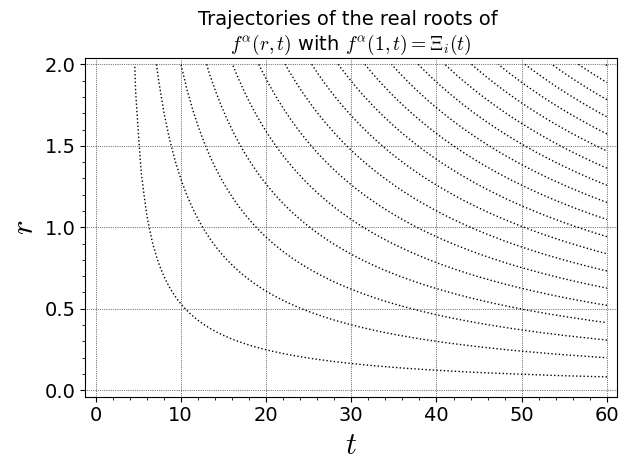

In [582]:
#Laguerre Flow direct evaluation for F = Xi_i

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),1])
z1=list_plot(ord, size=15, marker="o", color = "black")

CCF=ComplexBallField(53)

#set alpha once here:
global alpha
alpha = CCF("16")

def Xin(t):
    Xin=2 * CCF(t / 2).sin() / CCF(t)
    return Xin

#Laguerre flow closed form for F=Xi_i Humbert series expressed as finite series of 1F1s
CCF=ComplexBallField(200)

def LaguerreFlow(t, r):
    sumn=(DRF(0));
    for n in range(200):
        summandn =  CCF(-1).pow(n) / CCF(2*n+2).gamma() * CCF((CCF(r).pow(2)-1)/16).hypergeometric([CCF(alpha + n + 1)],[CCF("1.5")+n]) * CCF(CCF(t)*CCF(r)/2).pow(2*n)
        sumn = sumn + summandn
    return sumn

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000001");x0 = 2*k*RDF.pi();
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,1+tr) - LaguerreFlow(x0,1+tr))/(tr*100)
        h = LaguerreFlow(x0,1+tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = -1*(x1 - 2*k*RDF.pi())/(tr) 
    return dzdr3

#compute d/dr zk via formula
def verifyPDE(k):
    return 1/(2*k*pi())-(CCF(alpha)+CCF("0.5"))/(2*k*pi())+2*k*pi()

print("Automated checks:")
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be equal)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,1)-Xin(60)))

a1i16=implicit_plot(lambda t,r:(((LaguerreFlow(t, r)))),(t,0,60),(r,0,2),color='black',fontsize=14,linestyle =":",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$f^{\alpha}(r,t)$ with $f^\alpha(1,t) = \Xi_i(t)$',gridlines=True,plot_points=90)
show(a1i16,aspect_ratio='automatic')

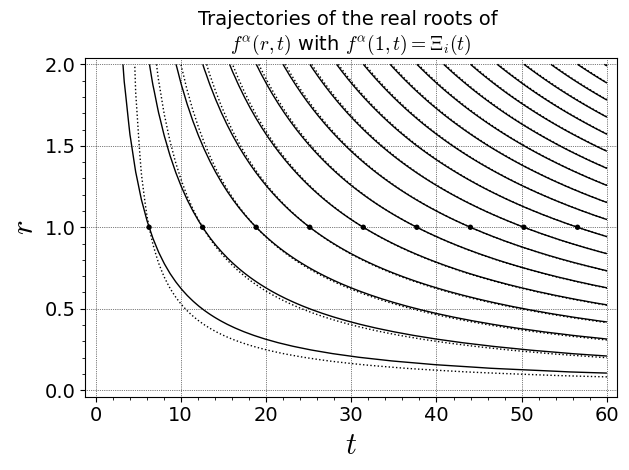

In [583]:
show(a1i1+a1i16+z1,aspect_ratio='automatic')

Automated checks:
d/dr z_3(0) via Newton approximation : 16.755161 versus formula: 16.755161 (should be equal).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


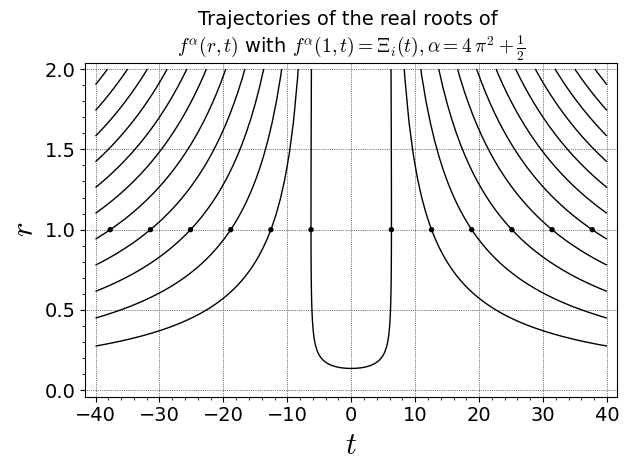

In [605]:
#Laguerre Flow direct evaluation for F = Xi_i

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(6):
    ord.append([2*pi()*(y+1),1])
    ord.append([-2*pi()*(y+1),1])
z1=list_plot(ord, size=15, marker="o", color = "black")

CCF=ComplexBallField(53)

#set alpha once here:
global alpha
alpha = CCF(4*pi()^2+ 0.5)

def Xin(t):
    Xin=2 * CCF(t / 2).sin() / CCF(t)
    return Xin

#Laguerre flow closed form for F=Xi_i Humbert series expressed as finite series of 1F1s
CCF=ComplexBallField(200)

def LaguerreFlow(t, r):
    sumn=(DRF(0));
    for n in range(200):
        summandn =  CCF(-1).pow(n) / CCF(2*n+2).gamma() * CCF((CCF(r).pow(2)-1)/16).hypergeometric([CCF(alpha + n + 1)],[CCF("1.5")+n]) * CCF(CCF(t)*CCF(r)/2).pow(2*n)
        sumn = sumn + summandn
    return sumn

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000001");x0 = 2*k*RDF.pi();
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,1+tr) - LaguerreFlow(x0,1+tr))/(tr*100)
        h = LaguerreFlow(x0,1+tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = -1*(x1 - 2*k*RDF.pi())/(tr) 
    return dzdr3

#compute d/dr zk via formula
def verifyPDE(k):
    return 1/(2*k*pi())-(CCF(alpha)+CCF("0.5"))/(2*k*pi())+2*k*pi()

print("Automated checks:")
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be equal)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,1)-Xin(60)))

a1i4pi=implicit_plot(lambda t,r:(((LaguerreFlow(t, r)))),(t,-40,40),(r,0,2),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$f^{\alpha}(r,t)$ with $f^\alpha(1,t) = \Xi_i(t), \alpha = 4\,\pi^2 + \frac{1}{2}$',gridlines=True,plot_points=120)
show(a1i4pi + z1,aspect_ratio='automatic')

Automated checks:
d/dr z_3(0) via Newton approximation : 10.471975 versus formula: 10.471976 (should be equal).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


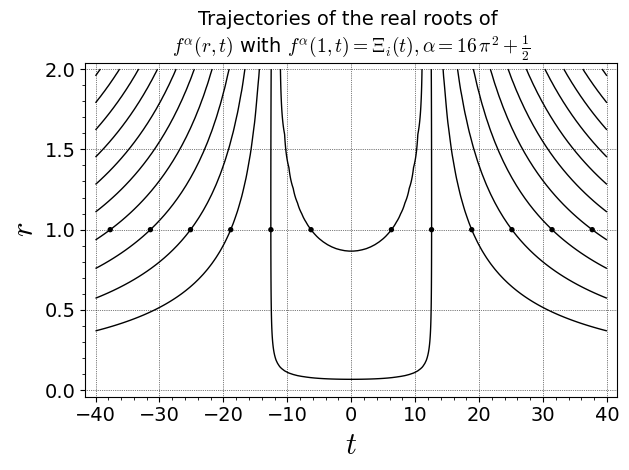

In [606]:
#Laguerre Flow direct evaluation for F = Xi_i

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(6):
    ord.append([2*pi()*(y+1),1])
    ord.append([-2*pi()*(y+1),1])
z1=list_plot(ord, size=15, marker="o", color = "black")

CCF=ComplexBallField(53)

#set alpha once here:
global alpha
alpha = CCF(16*pi()^2+0.5)

def Xin(t):
    Xin=2 * CCF(t / 2).sin() / CCF(t)
    return Xin

#Laguerre flow closed form for F=Xi_i Humbert series expressed as finite series of 1F1s
CCF=ComplexBallField(200)

def LaguerreFlow(t, r):
    sumn=(DRF(0));
    for n in range(200):
        summandn =  CCF(-1).pow(n) / CCF(2*n+2).gamma() * CCF((CCF(r).pow(2)-1)/16).hypergeometric([CCF(alpha + n + 1)],[CCF("1.5")+n]) * CCF(CCF(t)*CCF(r)/2).pow(2*n)
        sumn = sumn + summandn
    return sumn

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000001");x0 = 2*k*RDF.pi();
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,1+tr) - LaguerreFlow(x0,1+tr))/(tr*100)
        h = LaguerreFlow(x0,1+tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = -1*(x1 - 2*k*RDF.pi())/(tr) 
    return dzdr3

#compute d/dr zk via formula
def verifyPDE(k):
    return 1/(2*k*pi())-(CCF(alpha)+CCF("0.5"))/(2*k*pi())+2*k*pi()

print("Automated checks:")
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be equal)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,1)-Xin(60)))

a1i16pi=implicit_plot(lambda t,r:(((LaguerreFlow(t, r)))),(t,-40,40),(r,0,2),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$f^{\alpha}(r,t)$ with $f^\alpha(1,t) = \Xi_i(t), \alpha = 16\,\pi^2 + \frac{1}{2}$',gridlines=True,plot_points=120)
show(a1i16pi + z1,aspect_ratio='automatic')

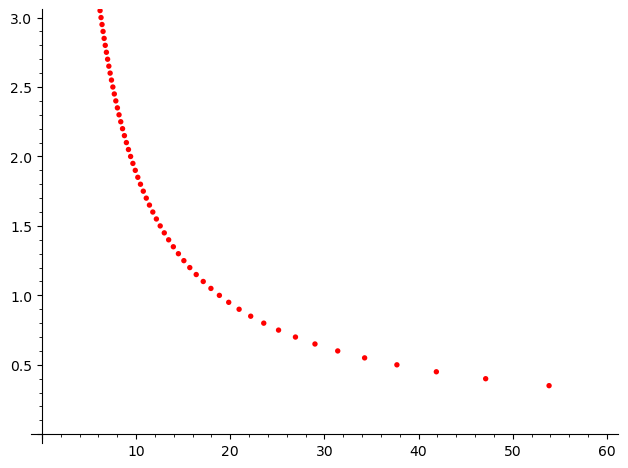

In [607]:
var("r");

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
ord = []
r = 0
while r < 3:
    r = r + 0.05
    ord.append([2*3*pi()/r,r])
z2=list_plot(ord, size=15, marker="o", color = "red",xmin=0,xmax=60,ymin=0,ymax=3)
z2

Automated checks:
d/dr z_3(0) via Newton approximation : 18.849556 versus formula: 18.849556 (should be equal).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


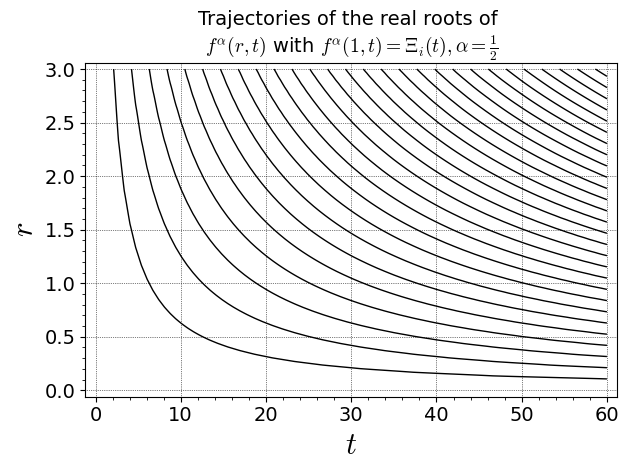

In [611]:
#Laguerre Flow direct evaluation for F = Xi_i

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),1])
z1=list_plot(ord, size=15, marker="o", color = "black")

CCF=ComplexBallField(53)

#set alpha once here:
global alpha
alpha = CCF("0.5")

def Xin(t):
    Xin=2 * CCF(t / 2).sin() / CCF(t)
    return Xin

#Laguerre flow closed form for F=Xi_i Humbert series expressed as finite series of 1F1s
CCF=ComplexBallField(200)

def LaguerreFlow(t, r):
    sumn=(DRF(0));
    for n in range(200):
        summandn =  CCF(-1).pow(n) / CCF(2*n+2).gamma() * CCF((CCF(r).pow(2)-1)/16).hypergeometric([CCF(alpha + n + 1)],[CCF("1.5")+n]) * CCF(CCF(t)*CCF(r)/2).pow(2*n)
        sumn = sumn + summandn
    return sumn

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000001");x0 = 2*k*RDF.pi();
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,1+tr) - LaguerreFlow(x0,1+tr))/(tr*100)
        h = LaguerreFlow(x0,1+tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = -1*(x1 - 2*k*RDF.pi())/(tr) 
    return dzdr3

#compute d/dr zk via formula
def verifyPDE(k):
    return 1/(2*k*pi())-(CCF(alpha)+CCF("0.5"))/(2*k*pi())+2*k*pi()

print("Automated checks:")
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be equal)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,1)-Xin(60)))

a1i1d2=implicit_plot(lambda t,r:(((LaguerreFlow(t, r)))),(t,0,60),(r,0,3),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$f^{\alpha}(r,t)$ with $f^\alpha(1,t) = \Xi_i(t), \alpha = \frac{1}{2}$',gridlines=True,plot_points=90)
show(a1i1d2,aspect_ratio='automatic')

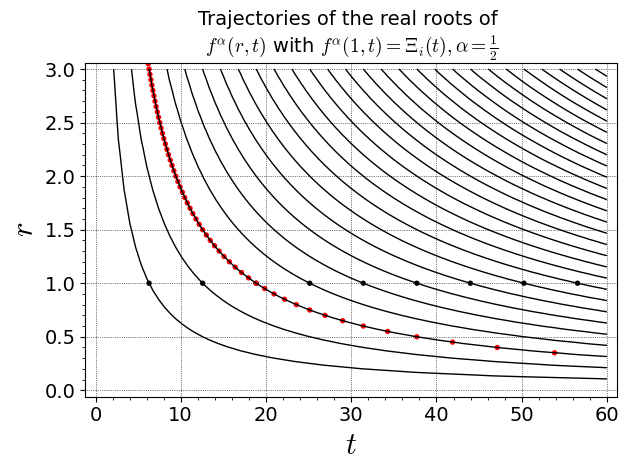

In [612]:
show(a1i1d2 + z1 + z2,aspect_ratio='automatic')

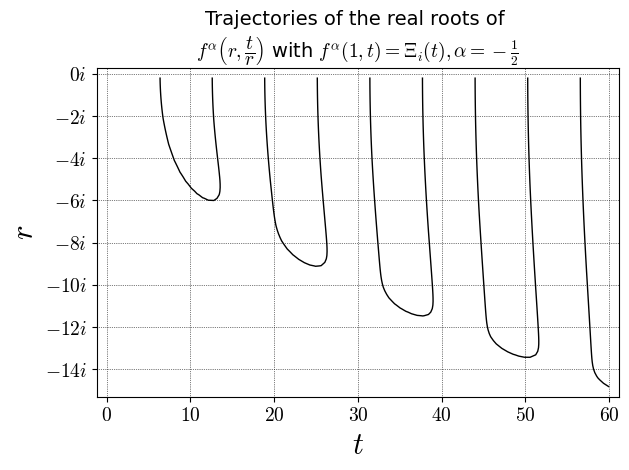

In [619]:
#Laguerre flow closed form for a = -1/2 and F=Xi_i
DRF=RealBallField(300)
CCF=ComplexBallField(300)

def prefact(r):
    pi = DRF.pi()
    r2m1 = CCF(r).pow(2) - 1
    return pi.sqrt() / CCF(r2m1).sqrt()

def expfact(t, r):
    t1 = CCF(t).pow(2) * CCF(r).pow(2) / (CCF(r).pow(2) - 1)
    return t1.exp()

def erfip (t,r):
    r2m1 = CCF(r).pow(2) - 1  
    t1 = CCF(0,1)*(r2m1 + 4 * CCF(0,1) * CCF(r) * CCF(t)) / (DRF("4")*r2m1.sqrt())
    return t1.erf()

def erfin (t,r):
    r2m1 = CCF(r).pow(2) - 1  
    t1 = CCF(0,1)*(r2m1 - 4 * CCF(0,1) * CCF(r) * CCF(t)) / (DRF("4")*r2m1.sqrt())
    return t1.erf()

def LaguerreFlow(t,r):
    r1 = CCF(r)*CCF(0,1)
    t1 = CCF(t)/CCF(r1)
    return (-CCF(0,1)*prefact(r1) * expfact(t1,r1) * (erfip(t1,r1) + erfin(t1,r1))).mid()

xt = [10 * k for k in range(0,7)]
xt_lbl = ['$0$', '$10$', '$20$', '$30$', '$40$', '$50$', '$60$']
yt = [2 * k for k in range(-7, 1)]
yt_lbl = ['$-14i$', '$-12i$', '$-10i$', '$-8i$', '$-6i$', '$-4i$', '$-2i$', '$0i$']

a1new=implicit_plot(lambda t,r:(LaguerreFlow(t,r)),(t,0,60),(r,-15,0),color='black',fontsize=14,linestyle ="-",linewidth=1,ticks=[xt, yt], tick_formatter = [xt_lbl, yt_lbl],axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$f^{\alpha}\left(r,\dfrac{t}{r}\right)$ with $f^\alpha(1,t) = \Xi_i(t), \alpha = -\frac{1}{2}$',gridlines=True,plot_points=90)
show(a1new,aspect_ratio='automatic')